In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

In [66]:
def read_data(path):
    df = pd.read_csv(path, infer_datetime_format=True, dtype=str)
    df.columns = df.columns.str.strip()
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    numeric_cols = ['Price', 'Quantity']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce') 
    cols = df.columns.values
    cols[-4] = "YEAR"
    df.columns = cols
    return df

def read_test_data(path):
    df = pd.read_csv(path, infer_datetime_format=True,dtype=str)
    df.columns = df.columns.str.strip()
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    numeric_cols = ['Price', 'Quantity']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    cols = df.columns.values
    cols[-4] = "YEAR"
    df.columns = cols

    return df

def calculate_extra_cols(df):
    df['total_price'] =  df['Price'] * df['Quantity'] 
    return df


In [67]:

df = read_data('/kaggle/input/combined-dataset-2009-2011/combine_dataset_2009_2011.csv')
df = calculate_extra_cols(df)
# df = pd.read_csv("/kaggle/input/combined-dataset-2009-2011/combine_dataset_2009_2011.csv")
df.head()

<ipython-input-66-d5845960319c>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, infer_datetime_format=True, dtype=str)
<ipython-input-66-d5845960319c>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,Invoice,StockCode,Description,Quantity,InvoiceDate,YEAR,Price,Customer ID,Country,total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,2009,6.95,13085.0,United Kingdom,83.4
1,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2009,2.10,13085.0,United Kingdom,100.8
2,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2009,1.25,13085.0,United Kingdom,30.0
3,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,2009,1.65,13085.0,United Kingdom,39.6
4,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,2009,1.25,13085.0,United Kingdom,30.0


In [68]:
# df1 = pd.read_csv("/kaggle/input/event-data-2009-2011/Year 2009-2010.csv")
# df2 = pd.read_csv("/kaggle/input/event-data-2009-2011/Year 2010-2011.csv")
# combined_df = pd.concat([df1, df2], ignore_index=True)
# combined_df = combined_df[combined_df['StockCode'].str.isnumeric()]
# combined_df.head()
# combined_df["InvoiceDate"] = pd.to_datetime(combined_df["InvoiceDate"])
# combined_df["Year"] = combined_df["InvoiceDate"].dt.year

# insert_pos = len(combined_df.columns) - 4

# insert_pos = max(0, insert_pos)

# # Reorder the columns
# cols = combined_df.columns.tolist()
# cols.insert(insert_pos, cols.pop(cols.index("Year")))

# combined_df= combined_df[cols]

# # Display the updated dataframe
# print(combined_df)
# combined_df.to_csv("combine_dataset_2009_2011.csv", index=False)

### Lets start with the brands

In [69]:
df["Description"] = df["Description"].fillna("").astype(str).map(lambda x: x.strip())
df["StockCode"] = df["StockCode"].map(lambda x: x.strip())
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,YEAR,Price,Customer ID,Country,total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,2009,6.95,13085.0,United Kingdom,83.4
1,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2009,2.10,13085.0,United Kingdom,100.8
2,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2009,1.25,13085.0,United Kingdom,30.0
3,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,2009,1.65,13085.0,United Kingdom,39.6
4,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,2009,1.25,13085.0,United Kingdom,30.0


In [70]:
# 5 most important Brands by quantity across 5 years
df['StockCode'] = df['StockCode'].str.extract('(\d+)')
top5 = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False)[:5]
top5

,Invoice,StockCode,Description,Quantity,InvoiceDate,YEAR,Price,Customer ID,Country,total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,2009,6.95,13085.0,United Kingdom,83.4
1,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2009,2.10,13085.0,United Kingdom,100.8
2,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2009,1.25,13085.0,United Kingdom,30.0
3,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,2009,1.65,13085.0,United Kingdom,39.6
4,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,2009,1.25,13085.0,United Kingdom,30.0


#### Lets check the volume of the top brands

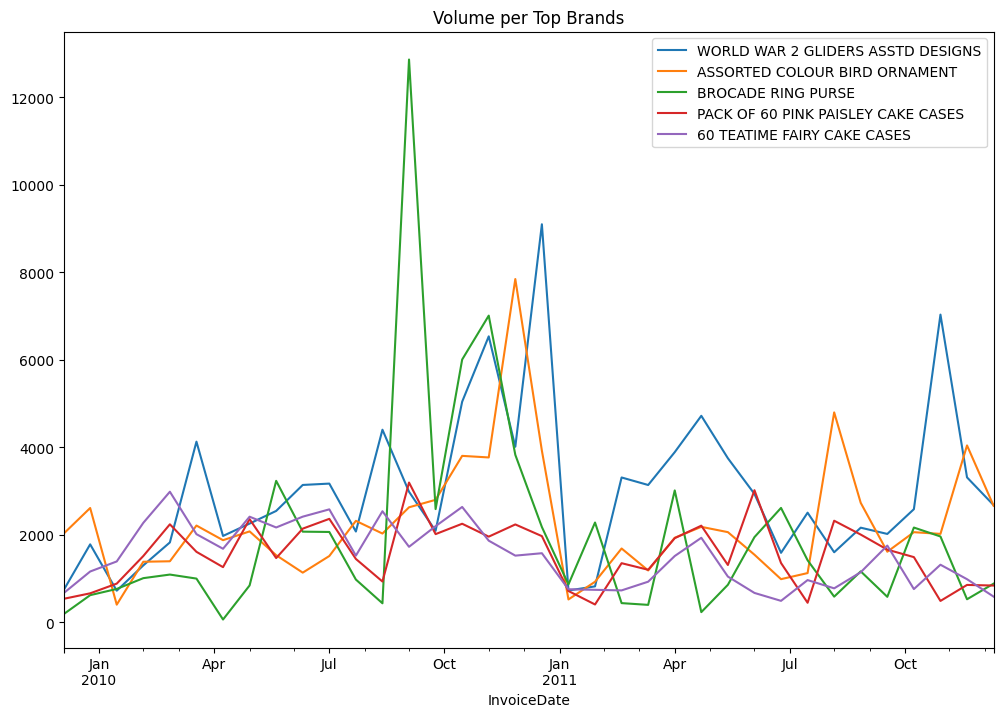

In [71]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")
df = df.dropna(subset=["InvoiceDate"]).set_index("InvoiceDate")  
df = df.sort_index()
ts = df[["Quantity", "Description", "total_price"]]
units_ts = ts[["Quantity", "Description"]]

plt.figure(figsize=(12, 8))

for brand in top5.index:
    new_ts = units_ts[units_ts["Description"] == brand]["Quantity"]
    if not new_ts.loc["2009-12":].empty:
        new_ts = new_ts.loc["2009-12":].resample("3W").sum()
        new_ts.plot(ax=plt.gca(), label=brand)

plt.legend()
plt.title("Volume per Top Brands")
plt.show()

#### Top 5 brands by price

In [72]:
# 5 most important Brands by revenue across 5 years
top_b_p = df.groupby("Description")["total_price"].sum().sort_values(ascending=False)[:5]
top_b_p

Description
REGENCY CAKESTAND 3 TIER          327813.65
PARTY BUNTING                     147948.50
ASSORTED COLOUR BIRD ORNAMENT     131413.85
PAPER CHAIN KIT 50'S CHRISTMAS    121662.14
CHILLI LIGHTS                      84854.16
Name: total_price, dtype: float64

,Invoice,StockCode,Description,Quantity,YEAR,Price,Customer ID,Country,total_price
InvoiceDate,,,,,,,,,
2011-12-09 12:50:00,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011,1.65,12680.0,France,19.80
2011-12-09 12:50:00,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011,1.65,12680.0,France,19.80
2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011,4.15,12680.0,France,16.60
2011-12-09 12:50:00,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011,3.75,12680.0,France,15.00
2011-12-09 12:50:00,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011,4.95,12680.0,France,14.85


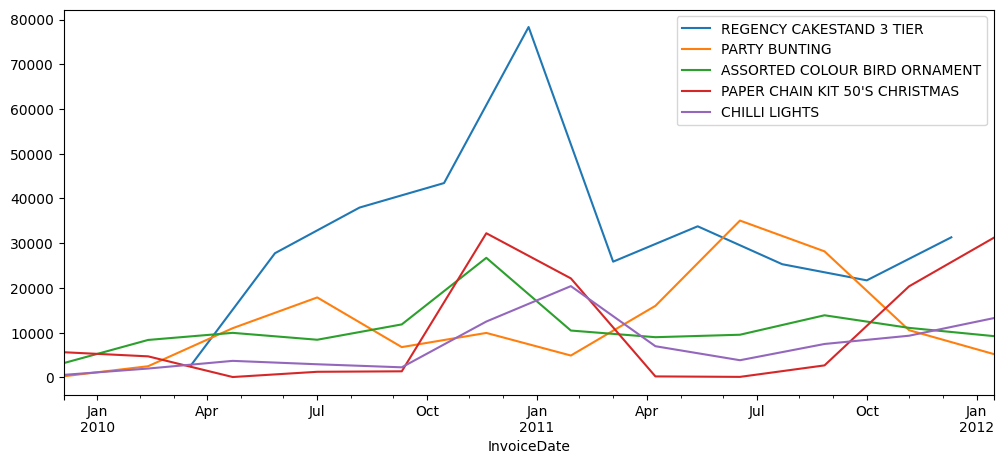

In [73]:
revenue_ts = ts[["total_price", "Description"]]
for brand in top_b_p.index[:5]:
    new_ts = revenue_ts[units_ts["Description"] == brand]["total_price"]
    if not new_ts.loc["2009-12":].empty:
        new_ts = new_ts.loc["2009-12":].resample("10W").sum()
        new_ts.plot(ax=plt.gca(), label=brand,figsize=(12, 5))
    # new_ts = new_ts["2013":].resample("10W").sum()
    # new_ts.plot(ax=plt.gca(), label=brand, figsize=(12, 5))
plt.legend()
df.tail()
# brandts.plot(logy=True)

### Now lets move to individual products

In [74]:
def get_top_products(n=5, by=None):
    return df.groupby("StockCode")[by].sum().sort_values(ascending=False)[:n]
top_p_q = get_top_products(n=8, by="Quantity") # Top products by units
top_p_r = get_top_products(n=8, by="total_price") # Top products by revenue
print("Top products by quantity", "\n", "-"*30)
print(top_p_q, "\n")
print("Top products by revenue", "\n", "-"*30)
print(top_p_r)
# df.groupby(["StockCode", "PRODUCTO"])["Quantity"].sum()
# ts = df.set_index("InvoiceDate")[["Quantity", "Description", "total_price"]]
print(df.columns)

Top products by quantity 
 ------------------------------
StockCode
84077    108545
21212     95450
84879     80705
22197     79363
17003     70700
21977     56575
84991     54366
22492     45384
Name: Quantity, dtype: int64 

Top products by revenue 
 ------------------------------
StockCode
22423    327813.65
47566    147948.50
84879    131413.85
22086    121662.14
79321     84854.16
22197     80300.07
22386     76244.93
84347     73814.72
Name: total_price, dtype: float64
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'YEAR', 'Price',
       'Customer ID', 'Country', 'total_price'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


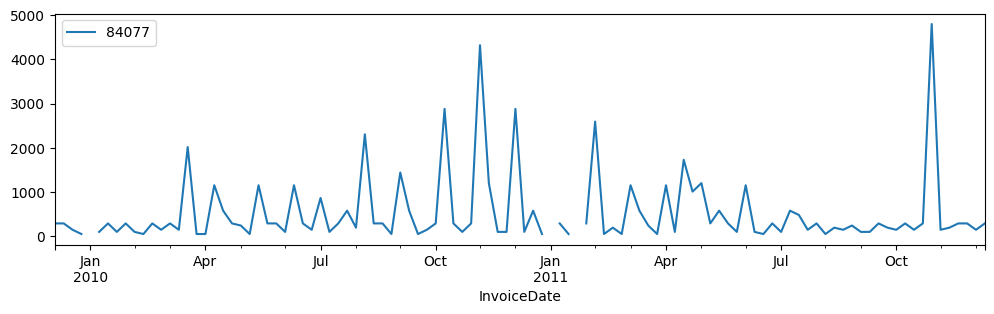

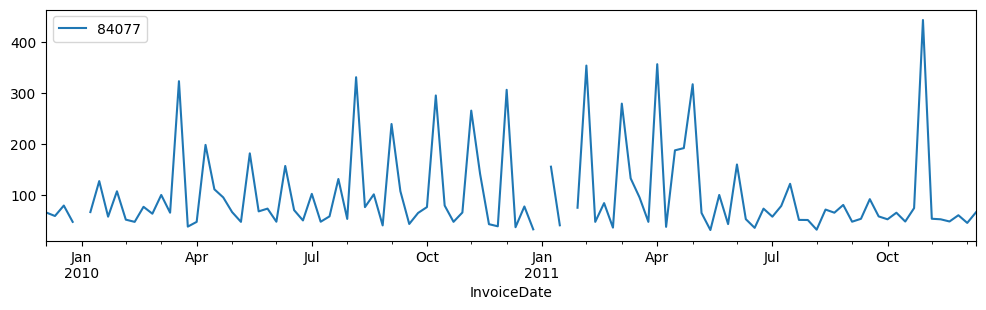

In [75]:
# # df.head()
from statsmodels.tsa.stattools import adfuller
ts = df[["Quantity", "StockCode", "total_price"]]
units_ts = ts[["Quantity", "StockCode"]]
test_ts = None
for prod_id in top_p_q.index[:1]:  
    product = prod_id
    d_range_s = "2009-12"
    d_range_e = "2011-12"
    resample = "W"
    new_ts = units_ts[units_ts["StockCode"] == prod_id]["Quantity"]
    plt.figure()
    new_ts2 = new_ts[d_range_s:d_range_e].resample(resample).max()
    new_ts2.plot(label=product, figsize=(12, 3))
    plt.legend()
    plt.figure()
    new_ts3 = new_ts[d_range_s:d_range_e].resample(resample).mean()
    new_ts3.plot(label=product, figsize=(12, 3))
    test_ts = np.log(new_ts3)
    plt.legend()


In [76]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    rolmean = timeseries.rolling(window=12, center=False).mean()
    rolstd = timeseries.rolling(window=12, center=False).std()

    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 
    

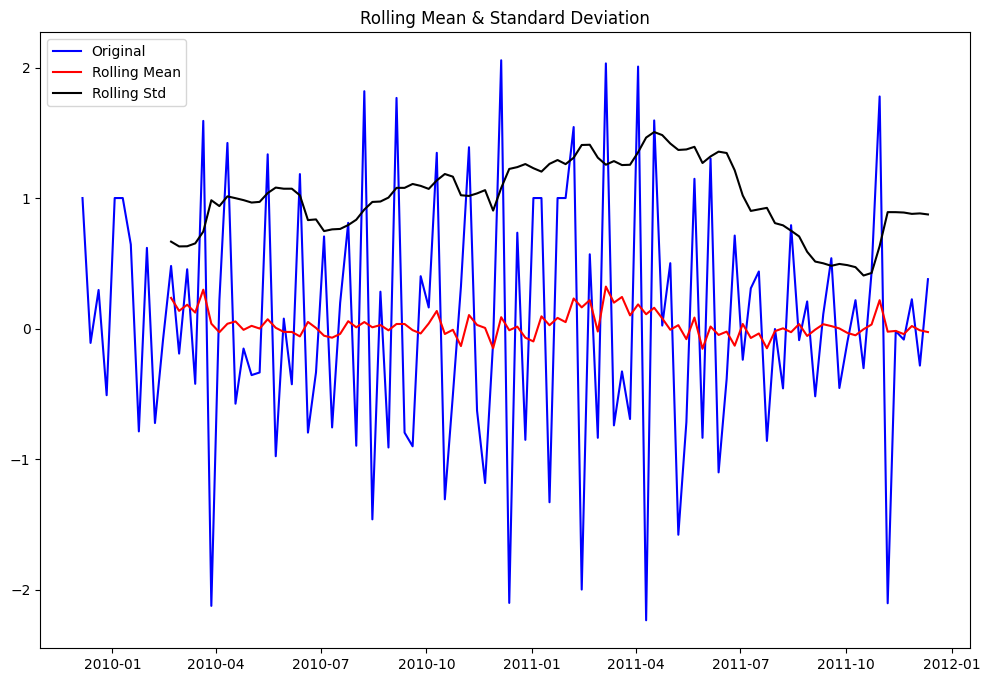

Results of Dickey-Fuller Test:
Test Statistic                -8.623519e+00
p-value                        6.015587e-14
#Lags Used                     3.000000e+00
Number of Observations Used    1.020000e+02
Critical Value (1%)           -3.496149e+00
Critical Value (5%)           -2.890321e+00
Critical Value (10%)          -2.582122e+00
dtype: float64


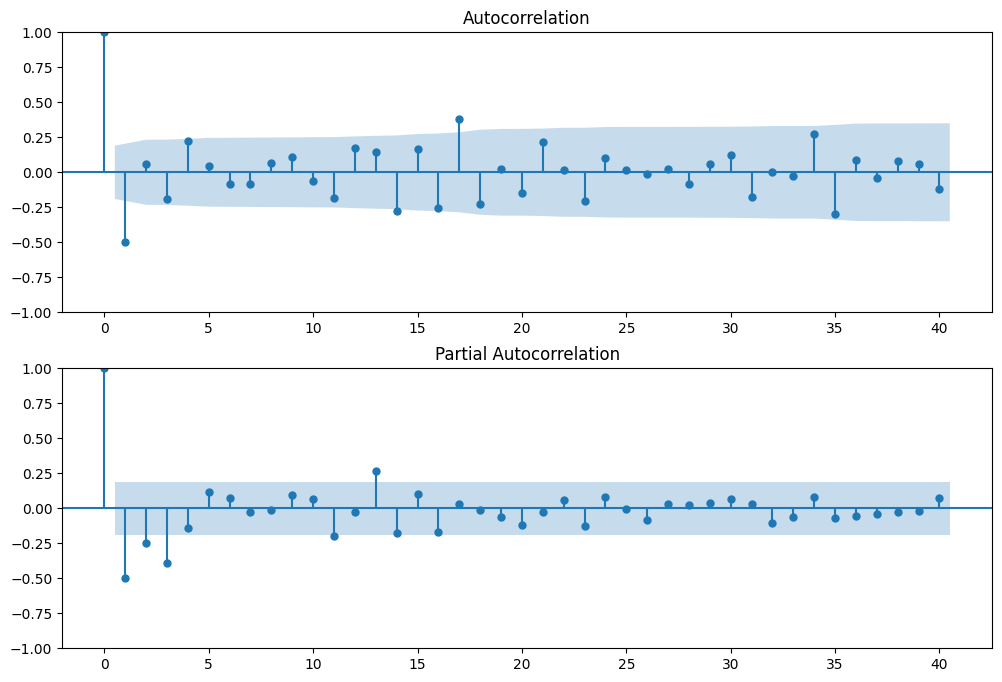

In [77]:
first_difference = test_ts - test_ts.shift(1)
test_stationarity(first_difference.fillna(1))
plot_acf_pacf(first_difference.fillna(1), 40)

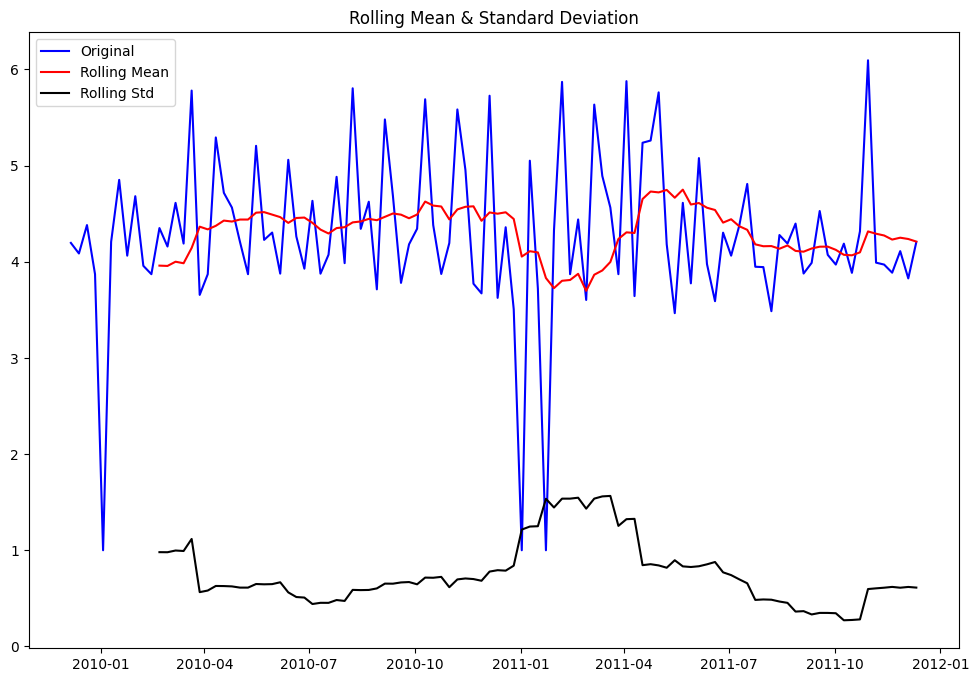

Results of Dickey-Fuller Test:
Test Statistic                 -3.864738
p-value                         0.002310
#Lags Used                      6.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64


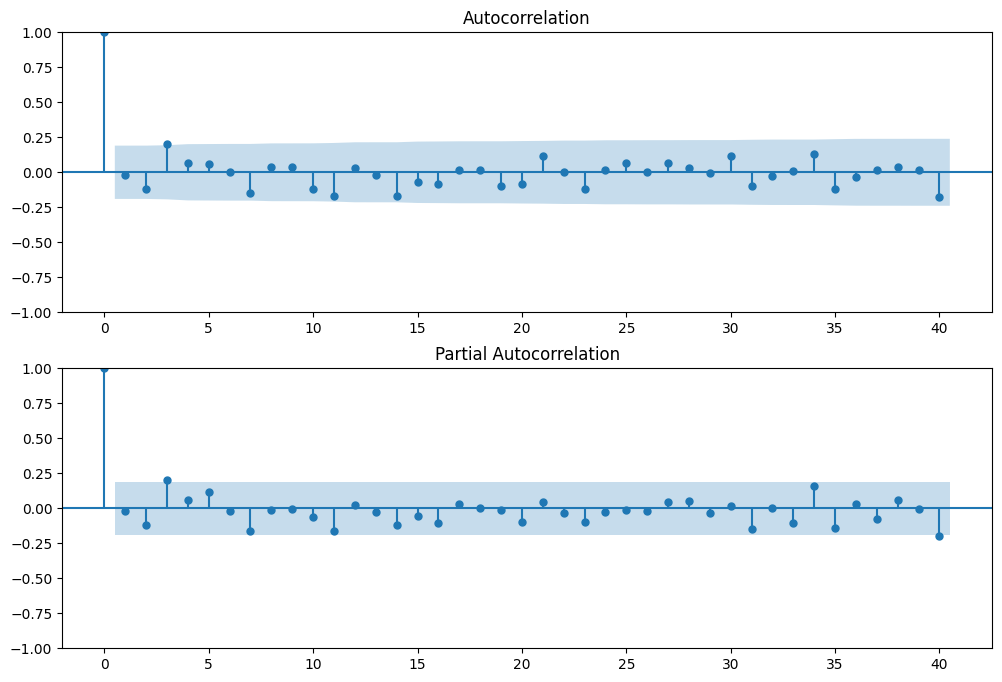

In [78]:
def plot_acf_pacf(your_data, lags):
   fig = plt.figure(figsize=(12,8))
   ax1 = fig.add_subplot(211)
   fig = plot_acf(your_data, lags=lags, ax=ax1)
   ax2 = fig.add_subplot(212)
   fig = plot_pacf(your_data, lags=lags, ax=ax2)
   plt.show()
test_stationarity(test_ts.fillna(1))
plot_acf_pacf(test_ts.fillna(0), 40)

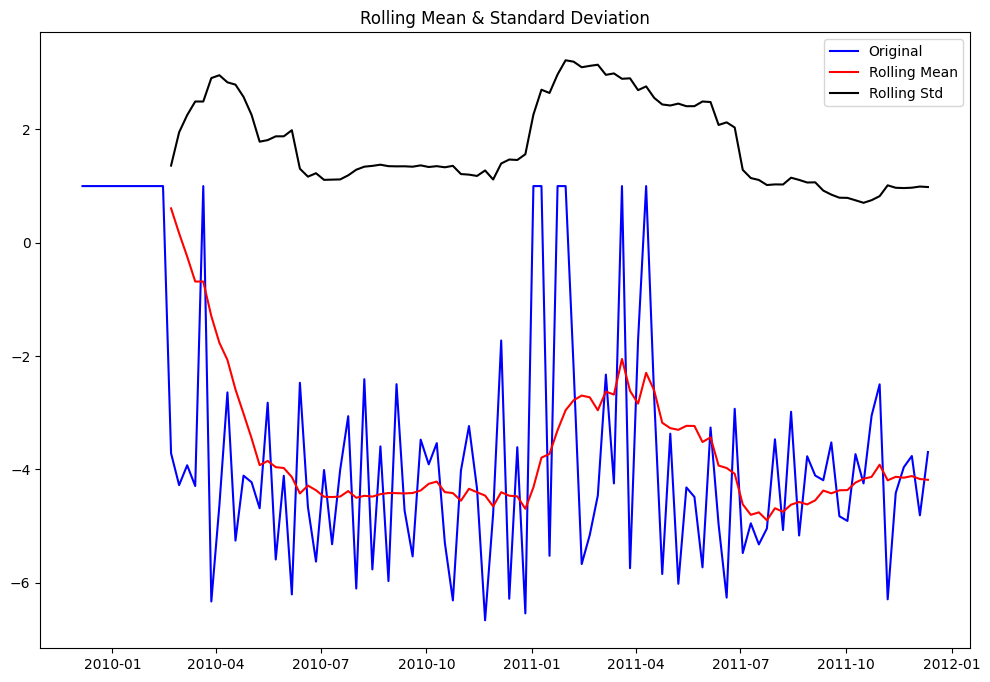

Results of Dickey-Fuller Test:
Test Statistic                -6.959916e+00
p-value                        9.221161e-10
#Lags Used                     0.000000e+00
Number of Observations Used    1.050000e+02
Critical Value (1%)           -3.494220e+00
Critical Value (5%)           -2.889485e+00
Critical Value (10%)          -2.581676e+00
dtype: float64


In [79]:
seasonal_difference = first_difference - test_ts.shift(11)
test_stationarity(seasonal_difference.fillna(1))

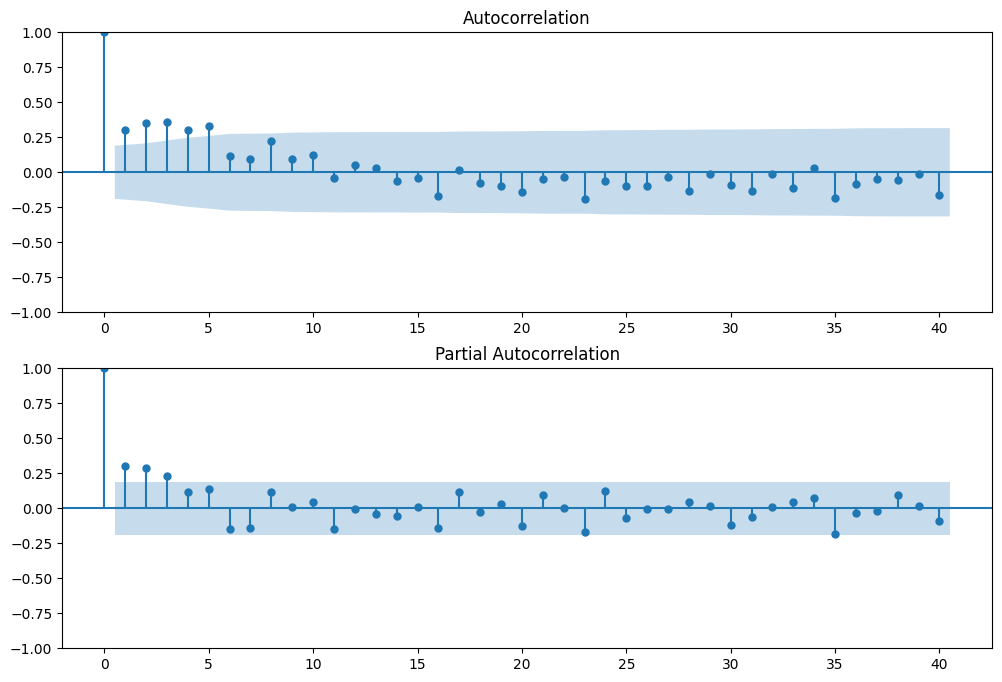

In [80]:


plot_acf_pacf(seasonal_difference.fillna(0), 40)
# seasonal_difference.plot()

<ipython-input-66-d5845960319c>:15: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, infer_datetime_format=True,dtype=str)
<ipython-input-66-d5845960319c>:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/d

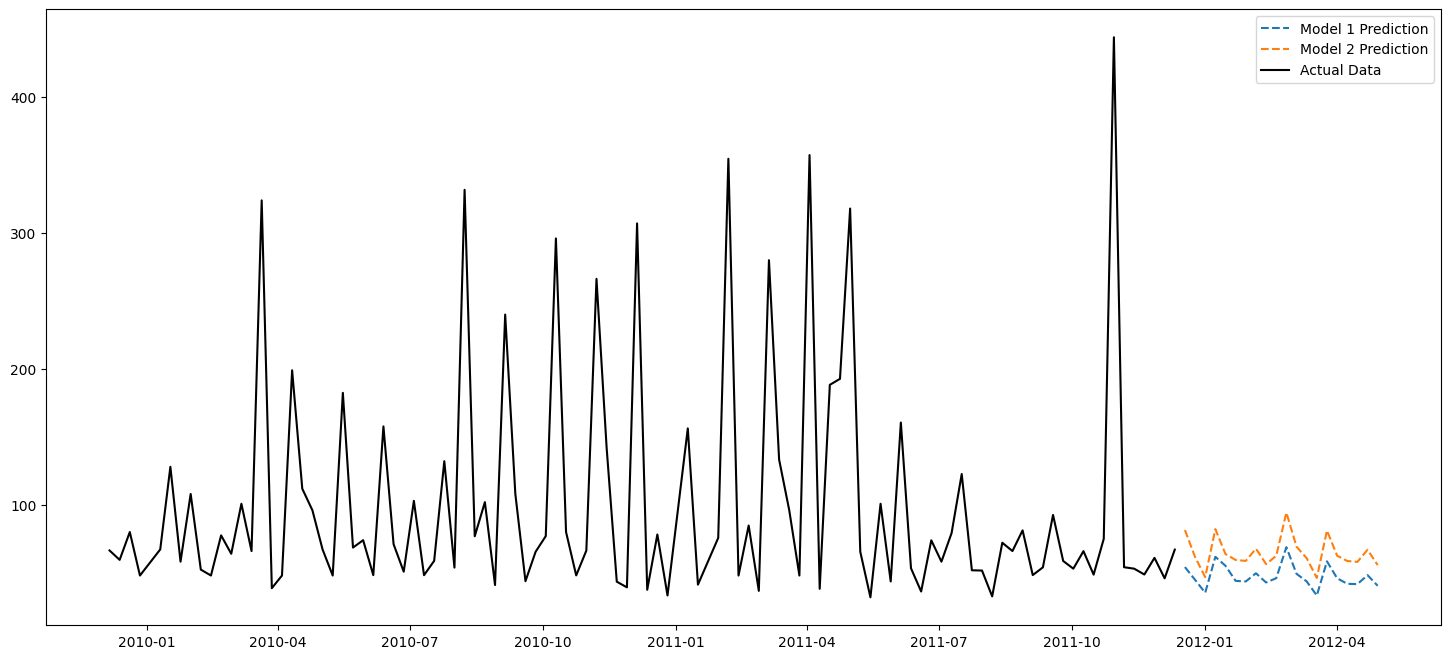

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Read and process data
df2 = read_test_data("/kaggle/input/combined-dataset-2009-2011/combine_dataset_2009_2011.csv")
df2["InvoiceDate"] = pd.to_datetime(df2["InvoiceDate"], errors="coerce")
test_ts = test_ts.dropna()

# Prepare time series data
ts2 = df2.set_index("InvoiceDate")["Quantity"]
ts2 = np.log(ts2.sort_index())
ts2[ts2 == np.inf] = 0
ts2 = pd.DataFrame(ts2.resample("W").mean())

df2 = pd.DataFrame(test_ts.fillna(0))
new_df = pd.concat([df2, ts2.fillna(1)])

# Fit SARIMAX models
model1 = SARIMAX(test_ts, order=(2,1,0), trend='n', time_varying_regression=True, mle_regression=False, seasonal_order=(1,1,1,11)).fit()
model2 = SARIMAX(test_ts, order=(0,1,2), trend='n', time_varying_regression=True, mle_regression=False, seasonal_order=(1,1,1,11)).fit()

# Generate future dates
future_dates = pd.date_range(start=test_ts.index[-1] + pd.Timedelta(weeks=1), periods=20, freq="W")

# Create DataFrame for predictions
forecast_df = pd.DataFrame(index=future_dates)
forecast_df["model1"] = model1.forecast(steps=20).values
forecast_df["model2"] = model2.forecast(steps=20).values

# Concatenate with test data
new_df = pd.concat([test_ts.to_frame(name="Quantity"), forecast_df])

# Convert back from log scale
new_df = np.exp(new_df)

# Plot results
plt.figure(figsize=(18, 8))
plt.plot(new_df.index, new_df["model1"], label="Model 1 Prediction", linestyle="dashed")
plt.plot(new_df.index, new_df["model2"], label="Model 2 Prediction", linestyle="dashed")
plt.plot(new_df.index, new_df["Quantity"], label="Actual Data", color="black")
plt.legend()
plt.show()


### Calculate metrics of my model

In [83]:
y_true = new_df[~new_df["model1"].isnull()]["Quantity"]
y_pred_1 = new_df[~new_df["model1"].isnull()]["model1"]
y_pred_2 = new_df[~new_df["model1"].isnull()]["model2"]

In [87]:
y_pred_1

2011-12-18    54.225888
2011-12-25    44.842672
2012-01-01    35.312683
2012-01-08    61.768361
2012-01-15    55.145257
2012-01-22    44.063517
2012-01-29    43.643640
2012-02-05    49.691917
2012-02-12    42.892574
2012-02-19    46.032653
2012-02-26    68.847169
2012-03-04    49.265020
2012-03-11    43.681967
2012-03-18    33.286706
2012-03-25    58.447356
2012-04-01    46.009217
2012-04-08    41.912819
2012-04-15    41.657527
2012-04-22    48.296539
2012-04-29    40.436591
Name: model1, dtype: float64

In [84]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             Quantity   No. Observations:                  103
Model:             SARIMAX(2, 1, 0)x(1, 1, [1], 11)   Log Likelihood                -117.419
Date:                              Sun, 09 Feb 2025   AIC                            244.838
Time:                                      15:18:23   BIC                            257.392
Sample:                                           0   HQIC                           249.903
                                              - 103                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7656      0.110     -6.990      0.000      -0.980      -0.551
ar.L2         -0.3449      0.099     -3.497      0.000      -0.538      -0.152
ar.S.L11       0.0758      0.171      0.443      0.658      -0.260       0.411
ma.S.L11      -0.9967     13.193     -0.076      0.940     -26.855      24.861
sigma2         0.5982      7.764      0.077      0.939     -14.620      15.816
===================================================================================
Ljung-Box (L1) (Q):                   2.40   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.12   Prob(JB):                         0.41
Heteroskedasticity (H):               0.89   Skew:                             0.18
Prob(H) (two-sided):                  0.75   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             Quantity   No. Observations:                  103
Model:             SARIMAX(2, 1, 0)x(1, 1, [1], 11)   Log Likelihood                -117.419
Date:                              Sun, 09 Feb 2025   AIC                            244.838
Time:                                      15:18:28   BIC                            257.392
Sample:                                           0   HQIC                           249.903
                                              - 103                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7656      0.110     -6.990      0.000      -0.980      -0.551
ar.L2         -0.3449      0.099     -3.497      0.000      -0.538      -0.152
ar.S.L11       0.0758      0.171      0.443      0.658      -0.260       0.411
ma.S.L11      -0.9967     13.193     -0.076      0.940     -26.855      24.861
sigma2         0.5982      7.764      0.077      0.939     -14.620      15.816
===================================================================================
Ljung-Box (L1) (Q):                   2.40   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.12   Prob(JB):                         0.41
Heteroskedasticity (H):               0.89   Skew:                             0.18
Prob(H) (two-sided):                  0.75   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             Quantity   No. Observations:                  103
Model:             SARIMAX(0, 1, 2)x(1, 1, [1], 11)   Log Likelihood                -101.648
Date:                              Sun, 09 Feb 2025   AIC                            213.296
Time:                                      15:19:30   BIC                            225.850
Sample:                                           0   HQIC                           218.361
                                              - 103                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.2158      0.136     -8.957      0.000      -1.482      -0.950
ma.L2          0.2903      0.132      2.193      0.028       0.031       0.550
ar.S.L11       0.0028      0.193      0.015      0.988      -0.376       0.382
ma.S.L11      -0.9871      4.507     -0.219      0.827      -9.821       7.847
sigma2         0.4100      1.784      0.230      0.818      -3.086       3.906
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.30
Prob(Q):                              0.98   Prob(JB):                         0.07
Heteroskedasticity (H):               1.24   Skew:                             0.55
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
test_ts

InvoiceDate
2009-12-06    4.196518
2009-12-13    4.086471
2009-12-20    4.382027
2009-12-27    3.871201
2010-01-10    4.207673
                ...   
2011-11-13    3.971149
2011-11-20    3.886705
2011-11-27    4.110874
2011-12-04    3.827191
2011-12-11    4.205625
Name: Quantity, Length: 103, dtype: float64